
# Project: Investigate a tmdb-movies Dataset 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I choose the TMDb movie data set for data analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I would like to find other intresting patterns in the dataset.
### contain:
* Total Rows = 10866
* Total Columns = 21
#### Questions:
+ which are the most popular movies ?
+ which movies that earn maximum profit (top 10) ?
+ which movies that have highest rating ?
+ which year has the maximum number of movies released  ?
+ what are the genres that have maximum number of movies ?
+ what are the Top 10 Directors Who Directs maximum number of movies ?
+ Which movies have maximum revenue?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties


In [2]:
# Loading  dataset using using pandas read_csv function and print out a few lines.
df=pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#check data length number of columns and rows.
df.shape

(10866, 21)

In [4]:
# some summary statistics about the whole data.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# inspecting data types and look for instances of missing or possibly errant dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#count total rows in each column which contain null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Observation from dataset
+ The dataset contain lots of movies which have budget or revenue of a value of 0


### Data Cleaning
Information that I need to **modify** or __delete__ .
1. check about duplicated rows and remove them.
2. specify the columns that I will use in the analysis process.
3. Remove the movies which are having zero value of budget and revenue
4. Drop missing data(nans) 

1. **check about duplicated rows and remove them.** 

In [7]:
# calculating number of dublicated rows
df.duplicated().sum()
#drop dublicated rows
df.drop_duplicates(inplace=True)
#check shape of dataset after dropping duplicates
print(df.shape)

(10865, 21)


2. __specify the columns that I will use in the analysis process__

In [8]:
movies_df=df[['original_title','genres','director','popularity','vote_average','budget_adj','revenue_adj','release_year'] ]
movies_df.head(2)

,original_title,genres,director,popularity,vote_average,budget_adj,revenue_adj,release_year
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,32.985763,6.5,1.379999e+08,1.392446e+09,2015
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,George Miller,28.419936,7.1,1.379999e+08,3.481613e+08,2015


3. __Remove the movies which are having zero value of budget or revenue__

In [9]:
#drop rows of movies that have zero budget or revenue
movies_df=movies_df.drop(movies_df[movies_df.budget_adj == 0 ].index | movies_df[movies_df.revenue_adj == 0 ].index  )
#len(movies_df)
movies_df.dtypes

original_title     object
genres             object
director           object
popularity        float64
vote_average      float64
budget_adj        float64
revenue_adj       float64
release_year        int64
dtype: object

4. __Drop missing data(nans)__ 

In [10]:
#check about null cells
movies_df.isnull().sum()

original_title    0
genres            0
director          1
popularity        0
vote_average      0
budget_adj        0
revenue_adj       0
release_year      0
dtype: int64

In [11]:
#there is only one missing value in director so wwe will drop it
movies_df=movies_df.dropna()
movies_df.isnull().sum()

original_title    0
genres            0
director          0
popularity        0
vote_average      0
budget_adj        0
revenue_adj       0
release_year      0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.




### Question-1 : which are the most popular movies ?

#### this is a bar chart shows top popular movies by plotting movies title on x-axis and popularity on y-axis

In [12]:
poular_movies = movies_df[['original_title','popularity'] ].sort_values(by='popularity',ascending=False)
poular_movies = poular_movies.head()


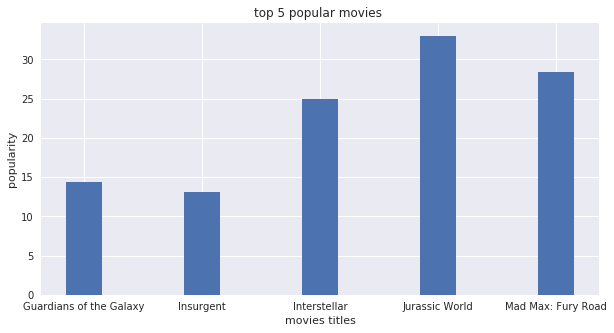

In [13]:
sns.set(rc={'figure.figsize':(10,5)})
plt.bar(poular_movies['original_title'],poular_movies['popularity'], width=0.3)
plt.xlabel('movies titles')
plt.ylabel('popularity')
plt.title('top 5 popular movies ')
plt.show();

### Question-2 :which movies that earn maximum profit (top 10) ?

#### this is a pointplot chart to shows the movies that makes max porfits so i plot profit in terms of 2010 dollars on x-axis and movies title on y-axis


In [14]:
# calculate the profit of each movie
movies_df['profit']=movies_df['revenue_adj'] - movies_df['budget_adj']
movies_df.head(2)

,original_title,genres,director,popularity,vote_average,budget_adj,revenue_adj,release_year,profit
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,32.985763,6.5,1.379999e+08,1.392446e+09,2015,1.254446e+09
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,George Miller,28.419936,7.1,1.379999e+08,3.481613e+08,2015,2.101614e+08


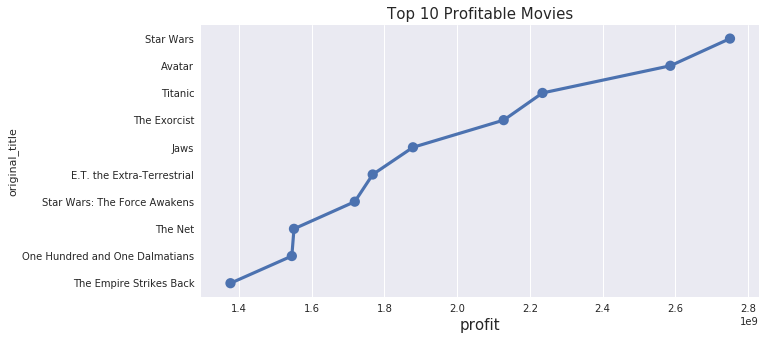

In [15]:
movie_profit = movies_df[['original_title','profit']].sort_values(by = 'profit',ascending=False)
movie_profit = movie_profit.head(10)

ax =sns.pointplot(x = "profit",
              y = "original_title",
              data = movie_profit)
#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 cs",fontsize = 15)
ax.set_xlabel("profit",fontsize = 15)
plt.show();

### __Question-3: which movies that have highest rating ?__

####  this is also a pointplot chart that show the Top 5 rated movies on which the movie rate plotted on x-axis  and  the movie title on y-axis

In [16]:
movies_average_vote = movies_df[['original_title','vote_average']].sort_values(by='vote_average',ascending=False)
top_5_voted_movies= movies_average_vote.head()


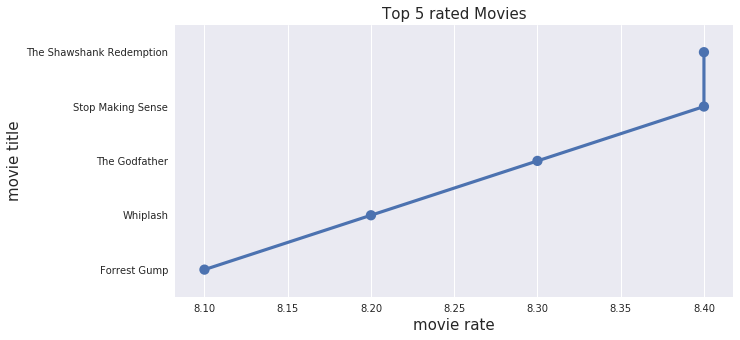

In [17]:
ax =sns.pointplot(x = "vote_average",
              y = "original_title",
              data = top_5_voted_movies)
#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 5 rated Movies",fontsize = 15)
ax.set_xlabel("movie rate",fontsize = 15)
ax.set_ylabel("movie title",fontsize = 15)
plt.show();


### __Question-4: which year has the maximum number of movies released__?

#### this is a line chart that shows number off movies over years to determine  which year that has maximu number of releases so on plotting release year on x-axis  and plotting number of movies released on y-axis 

In [32]:
releases_per_year=movies_df.groupby(['release_year']).original_title.count().to_frame(name='count of movies').reset_index()
releases_per_year


,release_year,count of movies
0,1960,5
1,1961,10
2,1962,7
3,1963,6
4,1964,7
5,1965,5
6,1966,5
7,1967,13
8,1968,9
9,1969,4


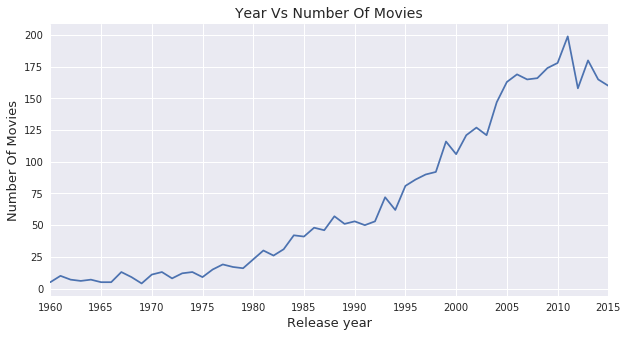

In [19]:
movies_df.groupby('release_year').count()['original_title'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

In [20]:
# concatenate all rows of given column and return string cocatenated by '|'
# then split on '|' and save them in series to can apply value_counts() function on this series 
def count_items(x):
    #concatenate all the rows of the given column and return string cocatenated by '|'
    data_plot = movies_df[x].str.cat(sep = '|')

    data = pd.Series(data_plot.split('|'))
    # count each of the genre and return.
    value_counts = data.value_counts(ascending=False)
    return value_counts


### __Question-5: what are the genres that have maximum number of movies__?

#### This is a barchart that shows different genres on x-axis and number of movies belong to each genre on y-axis

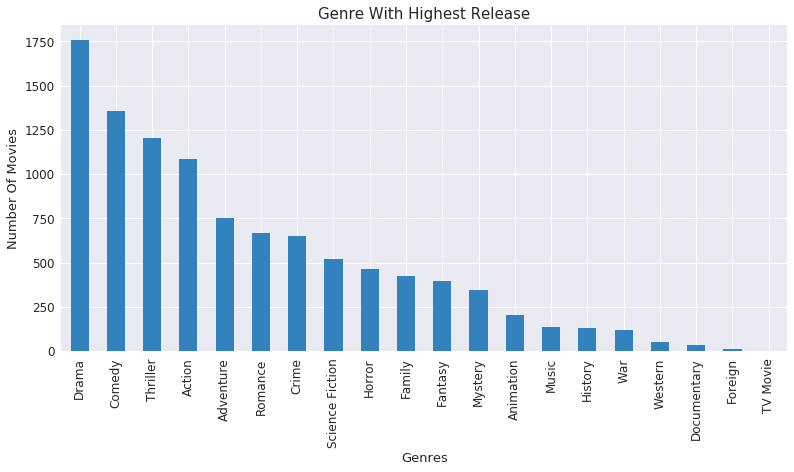

In [21]:
genre_movies_count = count_items('genres')
sns.set(rc={'figure.figsize':(13,6)})
#plot a 'bar' plot using plot function for 'genre vs number of movies'.
genre_movies_count.plot(kind= 'bar',fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Genres',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")


### __Question-6:what are the Top 10 Directors Who Directs maximum number of movies__?

#### This is a barchart that shows directors on x-axis and number of movies they direct on y-axis

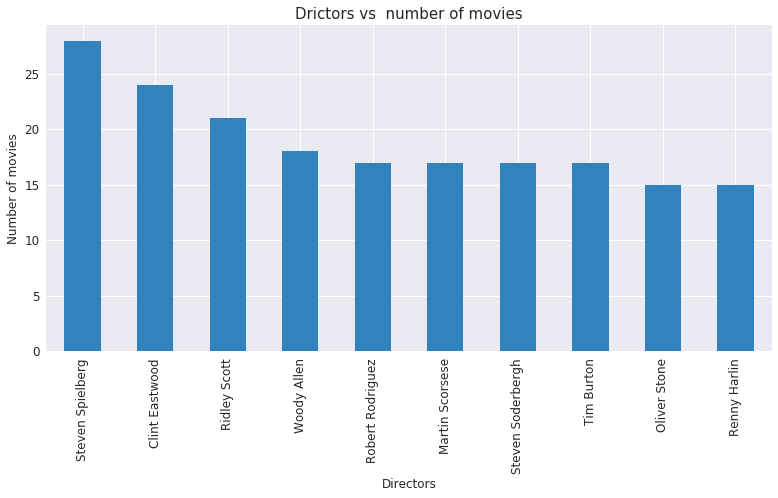

In [22]:
# pasing 'director' to function count_items() 
# as I am using value_counts() at count_items() function so it will 
#return DDirectors unique value and their frequencey (i.e number of movies of each director)
movies_per_director=count_items('director')
sns.set(rc={'figure.figsize':(13,6)})
movies_per_director.iloc[:10].plot(kind='bar',fontsize=12,colormap='tab20c')
plt.title('Drictors vs  number of movies',fontsize=15)
plt.xlabel('Directors',fontsize=12)
plt.ylabel('Number of movies',fontsize=12)
sns.set_style("whitegrid")

### __Question-7: Which movies have maximum revenue?__

#### this is a pointplot chart that shows top 10 movies with maximum revenue , by plotting revenue  in terms of 2010 dollars on x-axis and plotting movies titles on y-axis

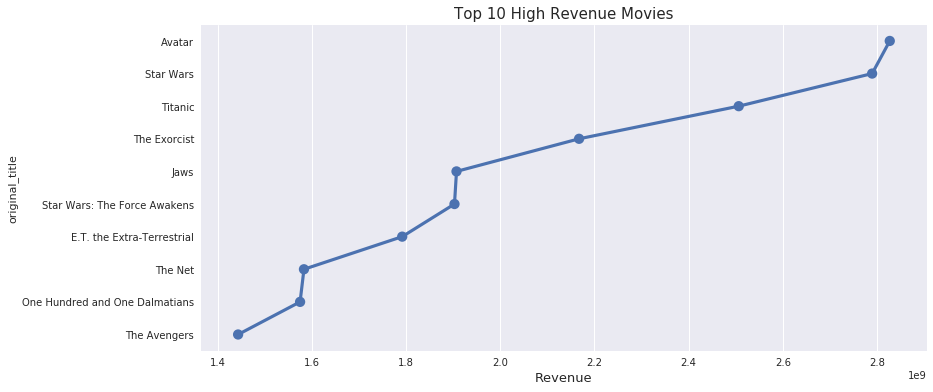

In [23]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
max_revenue_movies = movies_df[['original_title','revenue_adj']].sort_values(by='revenue_adj',ascending=False)
top_10=max_revenue_movies.head(10)
sns.set(rc={'figure.figsize':(13,6)})
ax = sns.pointplot(x='revenue_adj',y='original_title',data=top_10)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")

<a id='conclusions'></a>
## Conclusions

+ the most popular movie is jurassic world.
+ the most profitable movie is Star war.
+ the highest rating movie is the shawshank redemption.
+ 2011 has the maximum number of movies released which is 199 movie.
+ Drama is the genre that has the maximum number of movie released.
+ Steven Spielberg is one of the Top 10 Directors Who Directs maximum number of movies
+ Avatar movie has is maximum revenue movie
## Limitations
+  At cleaning the data there was large number of rows have zero budget or revenue or both i choose to drop them so  the dataset lenght decreased alot i guess it may affect the results negatively  
+ Genre column was need further cleaning  so i split the data seperated by '|' into lists for easy parsing during the exploration phase and that This increases the time taken in calculating the results

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0